# Circle

Consider the following scheme: distribute $n$ variables uniformly randomly around a circle then generate $m$ clauses of $a$ variables each where each clause has a random "center" point on the circle from which all variables in the clause must be within a certain distance $w$.

Observe the time taken to solve instances of different $w$.

In [29]:
# parameters
a = 5
m = 1000
n = 1000

In [1]:
import numpy as np
W = np.linspace(0.1, 0.5, num=16)
with open("w.txt", "w") as f:
    for w in W:
        print(w, file=f)
print(W)

[ 0.1         0.12666667  0.15333333  0.18        0.20666667  0.23333333
  0.26        0.28666667  0.31333333  0.34        0.36666667  0.39333333
  0.42        0.44666667  0.47333333  0.5       ]


## Generate instances

In [20]:
%%time
%%bash -s "$a" "$m" "$n"
cat w.txt | parallel sl -n "$3" -m "$2" -a "$1" -w "{}" -o "instance-{}.cnf" -q

CPU times: user 11.2 ms, sys: 12.1 ms, total: 23.3 ms
Wall time: 10min 2s


In [21]:
%ls

instance-0.1.cnf             instance-0.34.cnf
instance-0.126666666667.cnf  instance-0.366666666667.cnf
instance-0.153333333333.cnf  instance-0.393333333333.cnf
instance-0.18.cnf            instance-0.42.cnf
instance-0.206666666667.cnf  instance-0.446666666667.cnf
instance-0.233333333333.cnf  instance-0.473333333333.cnf
instance-0.26.cnf            instance-0.5.cnf
instance-0.286666666667.cnf  w.txt
instance-0.313333333333.cnf


In [22]:
! head instance-0.1.cnf

c generator: circle
c k: 5
c w: 0.1
p cnf 10000 10000
5936 8424 -1788 2567 -6611 0
210 -2651 -9041 -9980 -3031 0
-2352 -1802 9840 -5051 2124 0
-5350 515 7633 9654 -9211 0
-9878 3770 4641 -1674 -7087 0
971 3953 -3560 5307 -3917 0


## Solve

In [23]:
%%time
%%bash
for w in $(cat w.txt); do 
    cat instance-${w}.cnf | docker run --rm -i msoos/cryptominisat:v2 > result-${w}.out
done

CPU times: user 3.07 ms, sys: 5.49 ms, total: 8.56 ms
Wall time: 28.6 s


In [24]:
%ls

instance-0.1.cnf             result-0.126666666667.out
instance-0.126666666667.cnf  result-0.153333333333.out
instance-0.153333333333.cnf  result-0.18.out
instance-0.18.cnf            result-0.206666666667.out
instance-0.206666666667.cnf  result-0.233333333333.out
instance-0.233333333333.cnf  result-0.26.out
instance-0.26.cnf            result-0.286666666667.out
instance-0.286666666667.cnf  result-0.313333333333.out
instance-0.313333333333.cnf  result-0.34.out
instance-0.34.cnf            result-0.366666666667.out
instance-0.366666666667.cnf  result-0.393333333333.out
instance-0.393333333333.cnf  result-0.42.out
instance-0.42.cnf            result-0.446666666667.out
instance-0.446666666667.cnf  result-0.473333333333.out
instance-0.473333333333.cnf  result-0.5.out
instance-0.5.cnf             w.txt
result-0.1.out


## Analyze

In [25]:
%%bash
for w in $(cat w.txt); do
    printf "${w},"
    cat result-${w}.out | grep 'Total time' | sed 's/[^0-9\.]//g' | xargs echo -n
    printf ","
    cat result-${w}.out | grep '^s' | cut -d' ' -f 2
done | tee times.tsv

0.1,0.05,SATISFIABLE
0.126666666667,0.05,SATISFIABLE
0.153333333333,0.06,SATISFIABLE
0.18,0.04,SATISFIABLE
0.206666666667,0.06,SATISFIABLE
0.233333333333,0.07,SATISFIABLE
0.26,0.05,SATISFIABLE
0.286666666667,0.06,SATISFIABLE
0.313333333333,0.06,SATISFIABLE
0.34,0.06,SATISFIABLE
0.366666666667,0.05,SATISFIABLE
0.393333333333,0.06,SATISFIABLE
0.42,0.05,SATISFIABLE
0.446666666667,0.05,SATISFIABLE
0.473333333333,0.04,SATISFIABLE
0.5,0.05,SATISFIABLE


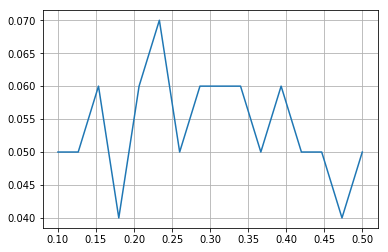

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('times.tsv', header=None)
W = data[:][0]
T = data[:][1]

fig, ax = plt.subplots(1, 1)

ax.plot(W, T, zorder=10)
ax.grid(True, zorder=5)
plt.show()